# Amazon Prime Video

This jupyter notebooks contains exploratory data analysis using the Amazon Prime video dataset obtained in May 2022. The credit for this data set goes to: <a href="https://github.com/victor-soeiro/WebScraping-Projects/tree/main/justwatch/data/amazon"> GitHub: Victor Soeiro</a>. The dataset contains information about each title like name, release year, genre et. along with ratings from two sources: IMDb and The Movie Database (TMDB). I was curious to find out if viewers preferred shows with short runtimes, around 20 mins and the most popular genres.

<br>

Major findings are summarised below:
- Prime Video has significantly more Movie listings (86%) than Shows (13%)
- There was a sharp increase in the titles produced around 2010
- The top 3 countries which produce content are: US, India, Great Britain
- Runtime of shows, which ranges from 20 mins - 60 mins is not correlated with ratings
- Top-rated Movies (IMDb) genres are: drama, thriller, action
- Top-rated Shows (IMDb) genres are: drama, comedy, crime

In [28]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Read the data
amazon_title_df = pd.read_csv('https://raw.githubusercontent.com/victor-soeiro/WebScraping-Projects/main/justwatch/data/amazon/titles.csv')

In [30]:
# Inspect a few rows to see the data
amazon_title_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
amazon_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [5]:
# Find out how many rows have null entries
amazon_title_df.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [6]:
# For this analysis, number of seasons and age rating is not critical
amazon_title_df = amazon_title_df.drop(columns=['seasons','age_certification'])
amazon_title_df.set_index('id')

,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,
ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6
tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0
tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.1,63026.0,8.435,7.8
tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],tt0032599,7.8,57835.0,11.270,7.4
tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,94,"['thriller', 'drama', 'romance']",['US'],tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...
tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,93,['drama'],['US'],tt7672388,5.3,20.0,1.406,NaN
tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,55,['comedy'],['US'],tt15041600,NaN,NaN,0.600,NaN
tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,116,['crime'],['IN'],NaN,NaN,NaN,1.960,NaN


### Exploratory Analysis

In [8]:
# Extract data about release years for easy plotting
titles_per_year = amazon_title_df.groupby('release_year').count()
shows_per_year = amazon_title_df[amazon_title_df['type'] == 'SHOW'].groupby('release_year').count()
movies_per_year = amazon_title_df[amazon_title_df['type'] == 'MOVIE'].groupby('release_year').count()

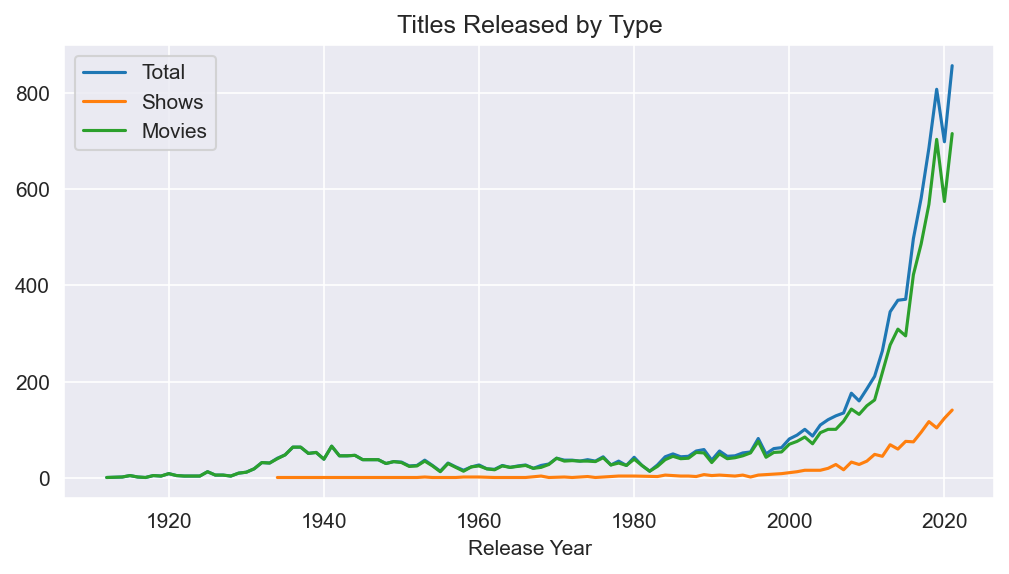

In [9]:
plt.figure(figsize=(8,4),dpi=150)
plt.xlabel('Release Year')
plt.title('Titles Released by Type')
plt.plot(titles_per_year['title'][:-1],label='Total')
plt.plot(shows_per_year['title'][:-1],label='Shows')
plt.plot(movies_per_year['title'][:-1],label='Movies')
plt.legend()

In [10]:
type_count = amazon_title_df['type'].value_counts()

Text(0.5, 1.0, 'Type of Content')

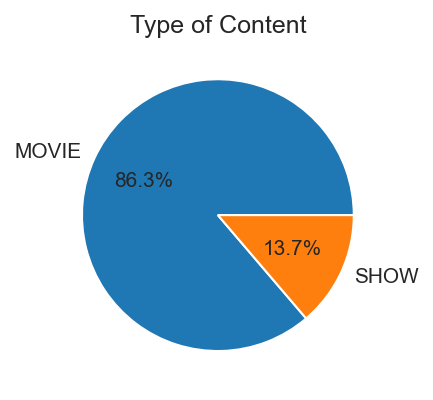

In [11]:
plt.figure(figsize=(6,3),dpi=150)
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%')
plt.title('Type of Content')

<AxesSubplot:title={'center':'Top Production Countries'}, xlabel='production_countries', ylabel='count'>

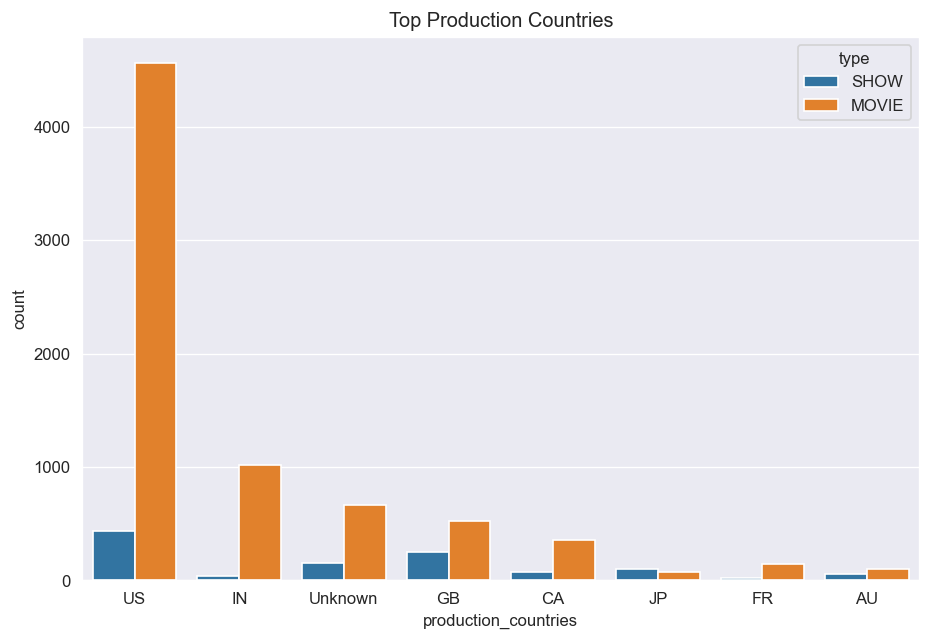

In [12]:
# Function to get the production country in the right format and replace null values with unknown
amazon_title_df['production_countries'] = amazon_title_df['production_countries'].apply(lambda x:'Unknown' if x[2:4] == '' else x[2:4])
plt.figure(figsize = (9,6),dpi=120)
plt.title('Top Production Countries')
sns.countplot(x='production_countries', data = amazon_title_df, order = amazon_title_df['production_countries'].value_counts().index[:8], hue='type')

### Rating Analysis

For this section, only titles with ratings from both sources were used. The original dataset had about 9800 entries, and the code block below shows that about 2500 were dropped. This is roughly 26% of the dataset but without the ratings, any comparison would not be ideal.

In [13]:
amazon_scores = amazon_title_df.dropna(subset=['tmdb_score','imdb_score'])
amazon_scores.shape

(7320, 13)

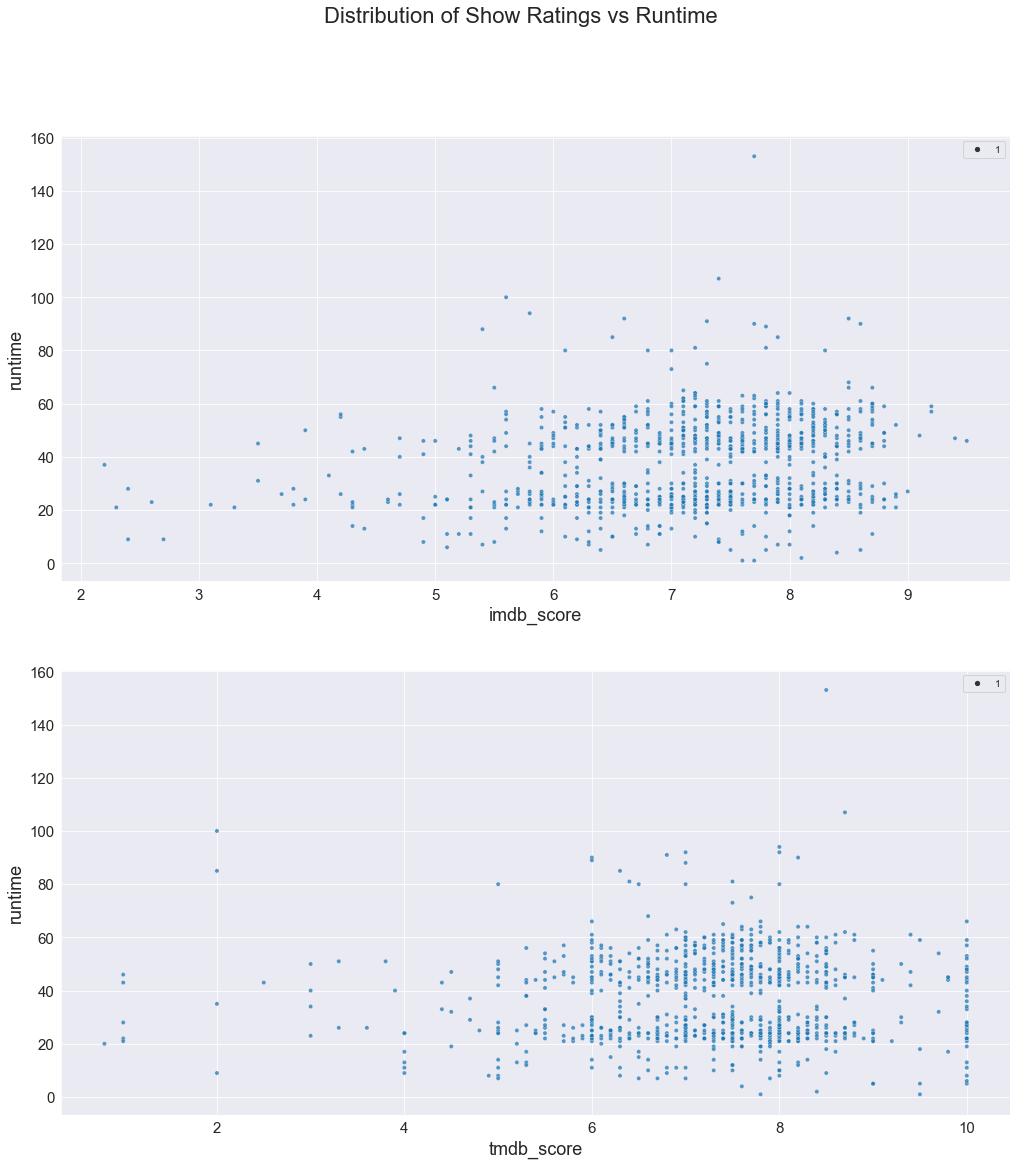

In [14]:
fig, axes = plt.subplots(2,1, figsize=(17,18), sharey='row')
fig.suptitle('Distribution of Show Ratings vs Runtime',size=22)
sns.scatterplot(data=amazon_scores[amazon_scores['type']=='SHOW'],x='imdb_score',y='runtime',size=1,alpha=0.75, ax=axes[0])
sns.scatterplot(data=amazon_scores[amazon_scores['type']=='SHOW'],x='tmdb_score',y='runtime',size=1,alpha=0.75, ax=axes[1])

for i in range(2):
    axes[i].xaxis.label.set_size(18)
    axes[i].yaxis.label.set_size(18)
    axes[i].tick_params(axis='both', which='major', labelsize=15)

The figures above show that most shows have a runtime between 20 mins and 60 mins. The rating are largely found between 6 and 8.5. Both sources IMDb and TMDB have a similar spread, showing no drastic variation. However, many Shows are rated 10 on TMDB, which could be due to a small number of voters.

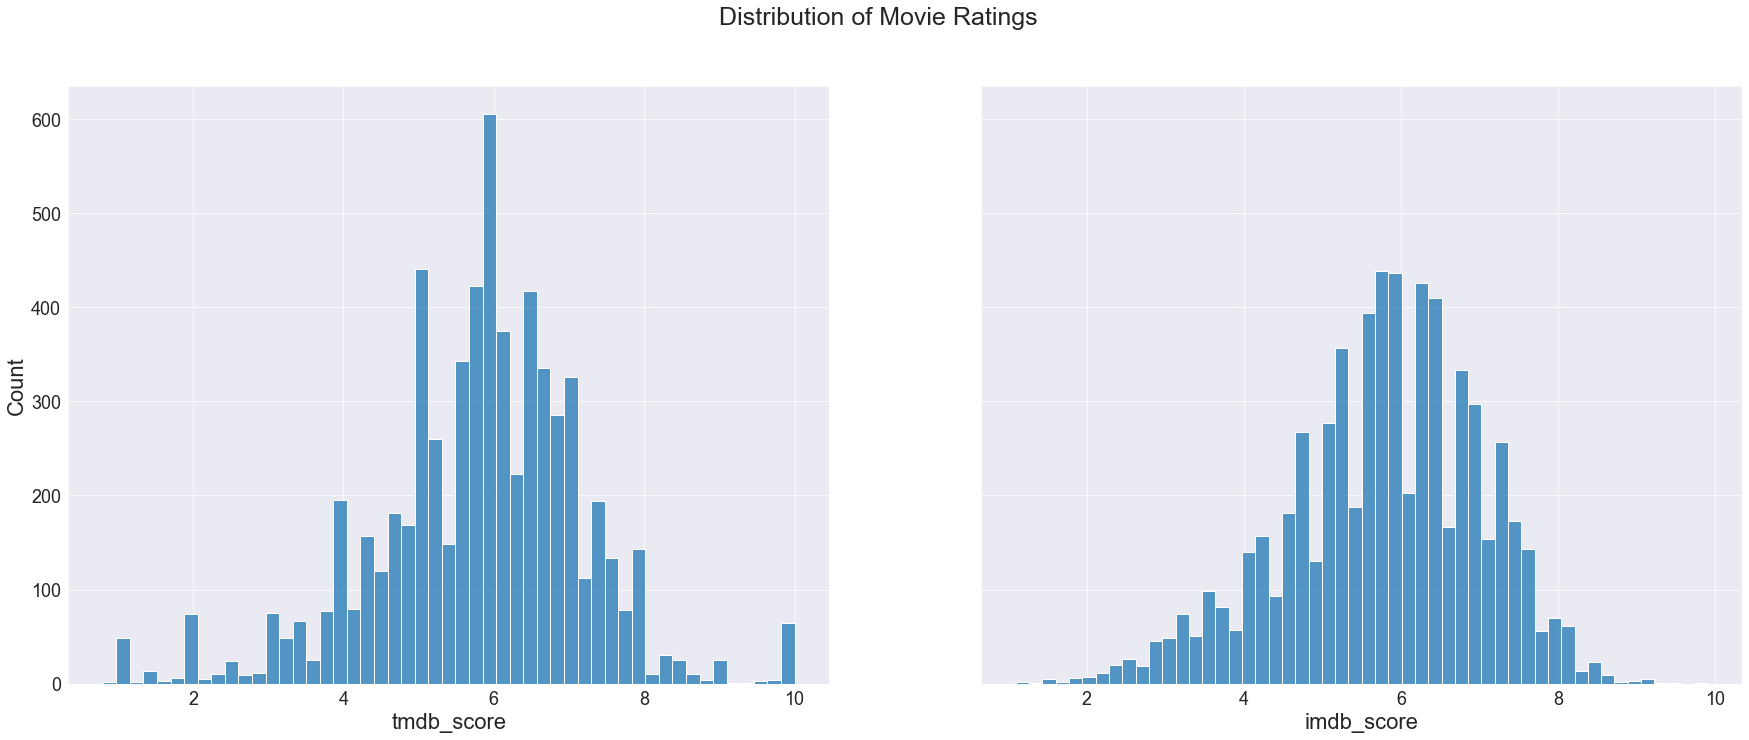

In [16]:
fig, axes = plt.subplots(1,2, figsize=(30,11), sharey='row')
fig.suptitle('Distribution of Movie Ratings',size=25)
sns.histplot(data=amazon_scores[amazon_scores['type']=='MOVIE'],x='tmdb_score', ax=axes[0])
sns.histplot(data=amazon_scores[amazon_scores['type']=='MOVIE'],x='imdb_score', ax=axes[1])
axes[0].yaxis.label.set_size(22)
for i in range(2):
    axes[i].xaxis.label.set_size(22)
    axes[i].tick_params(axis='both', which='major', labelsize=18)

The graphs above show the ratings from two sources are normally distributed around a mean of 6. The spread is largely similar for IMDb and TMDB. However, on TMDB there are some movies rated exactly 10, which is not the case for IMDb.

In [17]:
# Get the top 50 shows and movies
popular_df = amazon_scores[['title','type','genres','release_year','imdb_score','imdb_votes']]
popular_df = popular_df.sort_values(by = ['imdb_votes','imdb_score'], ascending = False)
popular_movies = popular_df[popular_df['type'] == 'MOVIE'].head(50).reset_index(drop=True)
popular_shows = popular_df[popular_df['type'] == 'SHOW'].head(50).reset_index(drop=True)

In [18]:
popular_movies

,title,type,genres,release_year,imdb_score,imdb_votes
0,Titanic,MOVIE,"['drama', 'romance']",1997,7.9,1133692.0
1,The Usual Suspects,MOVIE,"['thriller', 'crime', 'drama']",1995,8.5,1059480.0
2,Braveheart,MOVIE,"['drama', 'history', 'war']",1995,8.4,1016629.0
3,The Sixth Sense,MOVIE,"['thriller', 'drama']",1999,8.2,967864.0
4,The Terminator,MOVIE,"['thriller', 'action', 'scifi']",1984,8.1,841706.0
5,Skyfall,MOVIE,"['thriller', 'action']",2012,7.8,684779.0
6,District 9,MOVIE,"['scifi', 'thriller', 'action']",2009,7.9,670344.0
7,Arrival,MOVIE,"['drama', 'scifi', 'thriller']",2016,7.9,669220.0
8,Fargo,MOVIE,"['thriller', 'crime', 'drama']",1996,8.1,663221.0
9,Shrek,MOVIE,"['fantasy', 'animation', 'comedy', 'family', '...",2001,7.9,659470.0


In [19]:
popular_shows

,title,type,genres,release_year,imdb_score,imdb_votes
0,Dexter,SHOW,"['drama', 'thriller', 'crime']",2006,8.7,711566.0
1,How I Met Your Mother,SHOW,"['comedy', 'romance']",2005,8.3,661972.0
2,Vikings,SHOW,"['action', 'drama', 'war', 'history', 'romance...",2013,8.5,508388.0
3,House,SHOW,"['drama', 'comedy']",2004,8.7,448480.0
4,Better Call Saul,SHOW,"['comedy', 'drama', 'crime']",2015,8.8,404920.0
5,Suits,SHOW,"['drama', 'comedy']",2011,8.5,395600.0
6,Mr. Robot,SHOW,"['crime', 'drama', 'thriller']",2015,8.6,373828.0
7,The Boys,SHOW,"['scifi', 'action', 'crime', 'drama', 'comedy']",2019,8.7,362539.0
8,American Horror Story,SHOW,"['scifi', 'drama', 'thriller', 'crime', 'horror']",2011,8.0,304893.0
9,Community,SHOW,['comedy'],2009,8.5,252564.0


In [20]:
genres_dict = {}

# Function to obtain the frequency of genres of popular titles
# Returns a dictionary with key as genre and value as the frequency
def split_genres(string):
    left_pointer = 2
    right_pointer = 2
    n = len(string)

    while right_pointer < n:
        while string[right_pointer] != '\'':
            right_pointer += 1

        new_genre = string[left_pointer:right_pointer]

        if new_genre in genres_dict:
            genres_dict[new_genre] += 1
        else:
            genres_dict[new_genre] = 1

        left_pointer = right_pointer + 4
        right_pointer += 4


In [21]:
popular_movies['genres'].apply(split_genres)
df_movie_genre = pd.DataFrame.from_dict(genres_dict, orient='index', columns=['Count'])
df_movie_genre.sort_values('Count',ascending=False, inplace=True)

In [22]:
genres_dict = {}
popular_shows['genres'].apply(split_genres)
df_show_genre = pd.DataFrame.from_dict(genres_dict, orient='index',columns=['Count'])
df_show_genre.sort_values('Count',ascending=False, inplace=True)

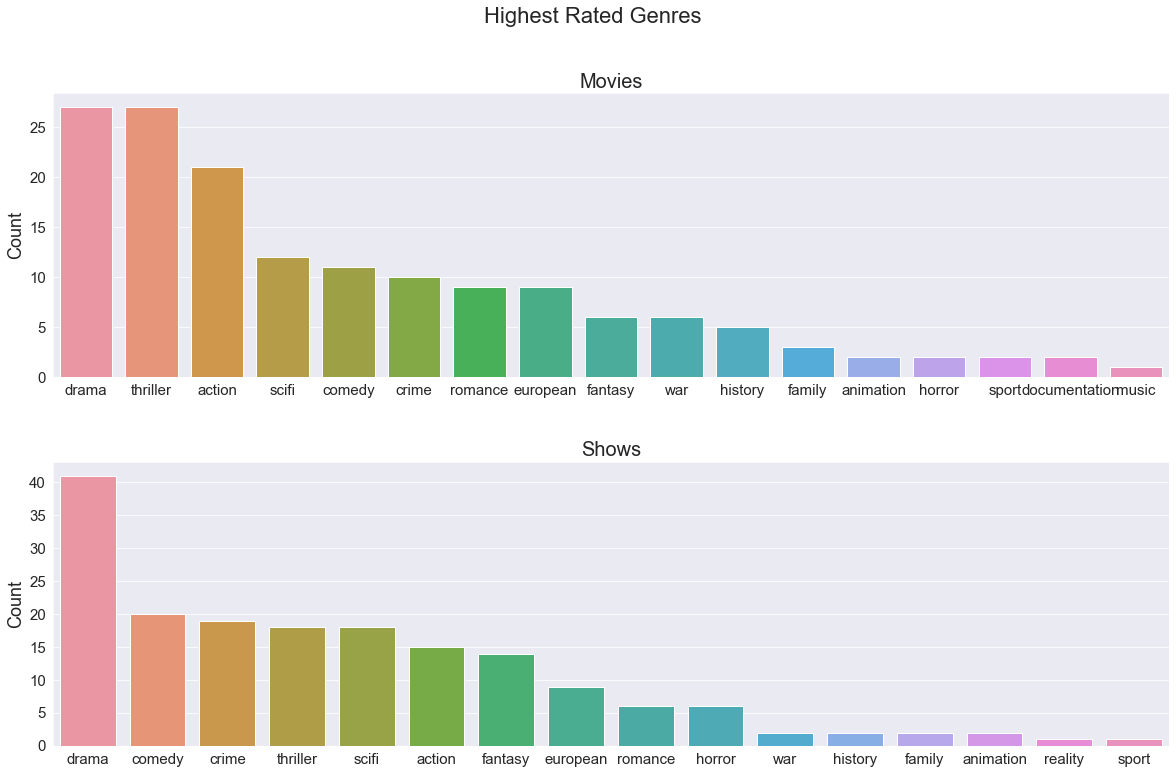

In [26]:
fig, axes = plt.subplots(2,1, figsize=(20,12))
plt.subplots_adjust(hspace=0.3)
fig.suptitle('Highest Rated Genres',size=22)

sns.barplot(x=df_movie_genre.index, y='Count', data=df_movie_genre, ax=axes[0])
sns.barplot(x=df_show_genre.index, y='Count', data=df_show_genre, ax=axes[1])
axes[0].set_title('Movies', size=20)
axes[1].set_title('Shows', size=20)

for i in range(2):
    axes[i].xaxis.label.set_size(18)
    axes[i].yaxis.label.set_size(18)
    axes[i].tick_params(axis='both', which='major', labelsize=15)

The End
<hr>